#                                    Random Sample Imputation 

-> it fills the data ramdomly from that perticular column where ramdon data has to be entered 

-> It does not change the distribution of data 

-> can applicable on both catagorical and numeric data 

# Importing Library

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data set

In [3]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


# Checking % of Null values

In [4]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

# Train_test Split 

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.head()

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


# Filling Null values Of Age by random Values 

### Making columns  

In [6]:
X_train['Age_imputed']=X_train['Age']  # making imputed columns with same values as age 
X_test['Age_imputed']=X_test['Age']

In [8]:
X_train.sample(5)

,Age,Fare,Age_imputed
863,NaN,69.55,NaN
776,NaN,7.75,NaN
225,22.0,9.35,22.0
820,52.0,93.50,52.0
454,NaN,8.05,NaN


# Imputing Null values with random 

In [9]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [10]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values   # here is all the random values 

array([22.  , 34.  , 39.  , 20.  , 18.  , 48.  , 32.  , 16.  , 33.  ,
       22.  , 22.  , 16.  , 42.  , 24.  , 32.  , 26.  , 47.  , 21.  ,
       24.  , 18.  , 35.  , 30.  , 30.  ,  2.  , 39.  , 36.  , 26.  ,
       24.  , 24.  , 26.  , 28.  , 42.  , 34.  , 30.  , 25.  , 45.5 ,
        0.83, 25.  , 23.5 , 61.  ,  2.  , 56.  , 51.  , 23.  , 28.  ,
       40.  , 34.  ,  7.  , 33.  ,  4.  , 32.  ,  7.  , 25.  , 19.  ,
       36.  ,  9.  , 24.  ,  8.  ,  0.67, 25.  , 52.  , 44.  , 27.  ,
       35.  , 27.  , 23.  , 29.  , 64.  , 44.  , 30.  ,  6.  , 26.  ,
       19.  , 33.  , 17.  , 36.  , 25.  , 21.  , 27.  , 39.  ,  9.  ,
       24.  , 46.  , 27.  , 16.  , 29.  , 29.  , 17.  , 56.  , 18.  ,
       13.  , 58.  , 21.  , 24.  , 29.  , 62.  , 18.  , 46.  , 40.  ,
        9.  , 25.  , 19.  , 36.  , 29.  , 21.  , 24.  , 22.  , 17.  ,
        5.  , 29.  , 16.  , 28.  , 32.  , 21.  , 28.  , 23.  , 27.  ,
       35.  , 37.  , 23.  , 28.  ,  9.  ,  4.  , 14.  , 50.  , 24.  ,
       31.  , 70.  ,

In [11]:
X_train.isnull().sum()   # in age imputed we have 0 null values 

Age            148
Fare             0
Age_imputed      0
dtype: int64

# Distribution Plot Of Age Before and After Random Imputation

C:\Users\DC\AppData\Local\Temp\ipykernel_4868\2642582470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
C:\Users\DC\AppData\Local\Temp\ipykernel_4868\2642582470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age_imp

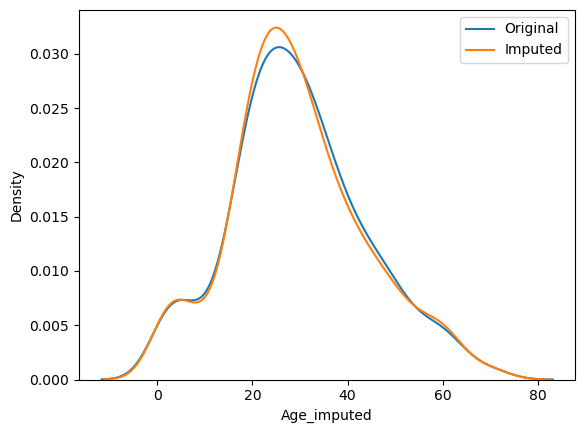

In [12]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

We can see that there is as not much change in the distribution of data 

# varience Before And After The Random Imputaion

In [13]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  204.5674027621725


There is not much change in the covarience as well 

# covarience Before And After The Random Imputaion

In [14]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,56.974404
Age,71.512440,204.349513,204.349513
Age_imputed,56.974404,204.349513,204.567403


There is a clear diffrence in the Coverience of columns 

# Checking the Outliers Before And After Random Imputation

<Axes: >

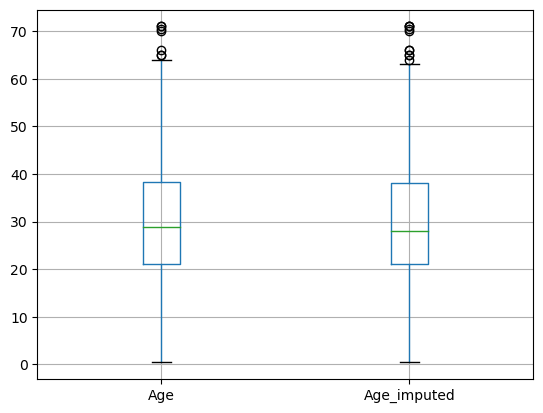

In [15]:
X_train[['Age', 'Age_imputed']].boxplot()

Age And Age_imputed have almost same outliers 